In [51]:
import scipy
from scipy import stats
from scipy import special
from scipy.stats import beta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
%matplotlib inline

In [113]:
input = "Species_properites_likelihood.csv"
species_properties = pd.DataFrame.from_csv(input)

In [182]:
# number of genes from the input matrix
n_genes=10000
# samples from a beta distribution of size species
gene_probs = beta.rvs(5, 5, size = n_genes)
genes = np.array(gene_probs)
properties_genes = genes.reshape(n_genes,1)
#print genes_shape
properties_genes.shape

(10000, 1)

In [187]:
# number of properties from the input matrix
n_properties=len(species_properties.axes[1])
# samples from a beta probability distribution of n_properties
property_probs = beta.rvs (1,5, size = n_properties)
probabilities = np.array(property_probs)
probs_shape= probabilities.reshape(1,n_properties)
#print probs_shape
probs_shape.shape



In [185]:
probability_distribution = np.dot(genes_shape,probs_shape)
probability_distribution.shape
# toss a coin,
# samples probability distribution for presence or absence 
coin_toss= scipy.stats.binom.rvs(1,probability_distribution)
effect = random.normal(size=np.size(coin_toss))
effect_shape = effect.reshape(n_genes,n_properties)
print effect_shape.shape
print(np.max(effect_shape * coin_toss))

(10000, 10)
4.64152860837


In [188]:

mult = pd.DataFrame( effect_shape * coin_toss)
mult.describe()

,0,1,2,3,4,5,6,7,8,9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000767,0.001251,-0.001595,0.002057,-0.002379,-0.000504,-0.000587,0.000085,0.001089,0.000973
std,0.141514,0.095165,0.152737,0.458453,0.128572,0.139236,0.222614,0.091914,0.176435,0.493962
min,-2.988246,-2.368132,-2.445372,-3.175332,-2.529415,-2.822585,-2.667557,-1.965970,-3.771072,-2.955251
25%,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
max,2.765426,2.830957,2.392209,4.641529,2.191498,2.742213,2.744615,2.830621,2.872868,3.791420


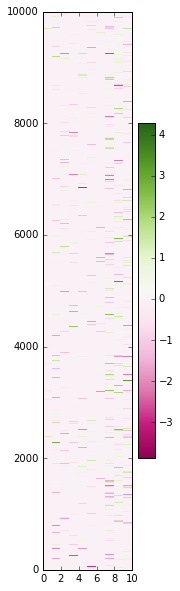

In [118]:
fig,ax = plt.subplots(1)
g = pal.colorbrewer.diverging.PiYG_11.get_mpl_colormap()
h=ax.pcolor(mult,cmap=g)
fig.colorbar(h)
fig.set_size_inches(2,10)

In [158]:
# rename species_properties and properties_genes to match your code

mult_t = mult.transpose()
property_effects = np.dot(species_properties, mult_t)

# Use exp to ensure that all the counts will be positive
expected_counts = np.exp(property_effects*6 + 2)

# Define negative binomial parameters, n and p
n = 2
p = n / (n + expected_counts)

# Randomly fill in the observed counts with negative binomial based on n and p
counts = expected_counts * 0 # start empty
for i in range(0, counts.shape[0]):
  counts[i] = scipy.stats.nbinom.rvs(n=n, p=p[i], size = expected_counts.shape[1])
  
print(counts)
print counts.size
print counts.sum()
count_df = pd.DataFrame(counts, dtype="int")

[[  2.50000000e+02   2.00000000e+00   1.40000000e+01 ...,   1.28400000e+03
    1.00000000e+01   3.21000000e+02]
 [  1.26400000e+03   1.00000000e+00   4.00000000e+00 ...,   7.70000000e+01
    7.52000000e+02   1.84000000e+02]
 [  1.72000000e+02   1.10000000e+01   2.00000000e+00 ...,   3.00000000e+02
    9.50000000e+01   1.40000000e+01]
 ..., 
 [  8.97000000e+02   9.00000000e+00   2.80000000e+01 ...,   1.43000000e+02
    3.64000000e+02   1.40100000e+03]
 [  2.65000000e+02   6.00000000e+00   6.00000000e+00 ...,   1.73000000e+02
    2.94000000e+02   1.05000000e+02]
 [  1.78000000e+02   1.00000000e+00   0.00000000e+00 ...,   4.32000000e+02
    9.20000000e+01   4.20000000e+02]]
1000000
2.87961986144e+13


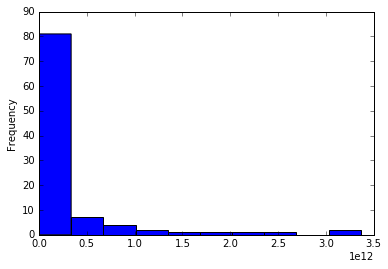

In [169]:
count_df.T.sum().plot(kind='hist')

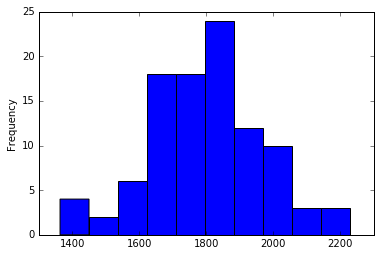

In [167]:
count_df[count_df==0].T.count().plot(kind='hist')

In [180]:
count_df.iloc[:,0:100].describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,990.860000,7.860000,7.260000,7.040000,0.870000,16.370000,7.310000,8.130000,7.25000,1.460000,...,29.380000,64.740000,16.26000,30.230000,6004.250000,5.35000,4.880000,1491.760000,23.090000,0.350000
std,1305.914317,6.314997,4.829664,4.869862,1.767581,19.140446,6.442747,6.049718,5.85925,1.654013,...,26.489861,90.278539,46.30501,35.881921,27052.348565,4.68907,4.727483,4092.995485,20.066604,0.957427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,1.000000,0.00000,0.000000,6.000000,0.00000,0.000000,2.000000,0.000000,0.000000
25%,167.750000,3.000000,4.000000,3.000000,0.000000,4.750000,3.000000,4.000000,3.00000,0.000000,...,11.750000,16.750000,1.00000,7.750000,208.750000,2.00000,2.000000,55.000000,9.000000,0.000000
50%,455.500000,6.000000,6.500000,6.000000,0.000000,11.000000,5.000000,7.000000,6.00000,1.000000,...,21.000000,36.500000,3.00000,16.500000,534.000000,5.00000,3.000000,211.000000,15.000000,0.000000
75%,1387.000000,10.250000,10.000000,10.000000,1.000000,20.000000,10.000000,10.250000,8.25000,2.000000,...,38.250000,75.250000,11.00000,34.250000,1436.500000,7.25000,7.000000,843.250000,30.250000,0.000000
max,8210.000000,28.000000,28.000000,21.000000,9.000000,123.000000,30.000000,40.000000,32.00000,7.000000,...,175.000000,604.000000,363.00000,211.000000,190789.000000,30.00000,27.000000,27841.000000,96.000000,5.000000
